# Prediction using Rpart

##### loading libraries

In [ ]:
library(data.table)
library(rpart)
library(rpart.plot)
library(pROC)

##### loading datasets

In [2]:
load("../data_processed/projetDataBase.Rda")
projetTrain    = sub.projetTrain.base
projetValid    = sub.projetValid.base

##### making subsets for train and test of our TRAIN DATA

In [7]:
set.seed(30)
split = sample(nrow(projetTrain), floor(0.8*nrow(projetTrain)))
sub.train = projetTrain[split,]
sub.test  = projetTrain[-split,]

##### Computing the rpart model 

In [8]:
rpart.model = rpart(target~.,data=sub.train,control=rpart.control(minsplit=5,cp=0))

In [6]:
rpart.model.optimal = prune(rpart.model,cp=rpart.model$cptable[which.min(rpart.model$cptable[,4]),1])

##### model description

In [25]:
rpart.model.optimal$splits

,count,ncat,improve,index,adj
BMI,25690,1,2008.74690702552,0.4940279825,0
Wt,25690,1,1486.36960353472,0.2855648535,0
Medical_History_23,25690,3,1219.44244458111,1,0
Medical_Keyword_15,25690,2,1145.26157213656,2,0
Medical_History_4,25690,2,860.51024345109,3,0
Wt,0,1,0.840677306344881,0.321129707,0.555929261147879
Medical_Keyword_15,0,2,0.671545348384585,4,0.0845177389606162
Medical_History_6,0,3,0.666017905799922,5,0.0691114245416078
Medical_Keyword_48,0,2,0.665978980147917,6,0.0690029293696429
Medical_History_23,0,3,0.664344102763721,7,0.0644461321471193


##### Prediction on test set

In [13]:
result.predicted.prob <- predict(rpart.model.optimal, sub.test , type="prob") # Prediction

1          2          3          4          5          6 
0.01181435 0.76246600 0.84528149 0.71307570 0.01181435 0.10593375

##### AUC curve


Call:
roc.default(response = sub.test$target, predictor = result.predicted.prob[,     "OK"])

Data: result.predicted.prob[, "OK"] in 6893 controls (sub.test$target KO) < 3384 cases (sub.test$target OK).
Area under the curve: 0.8725

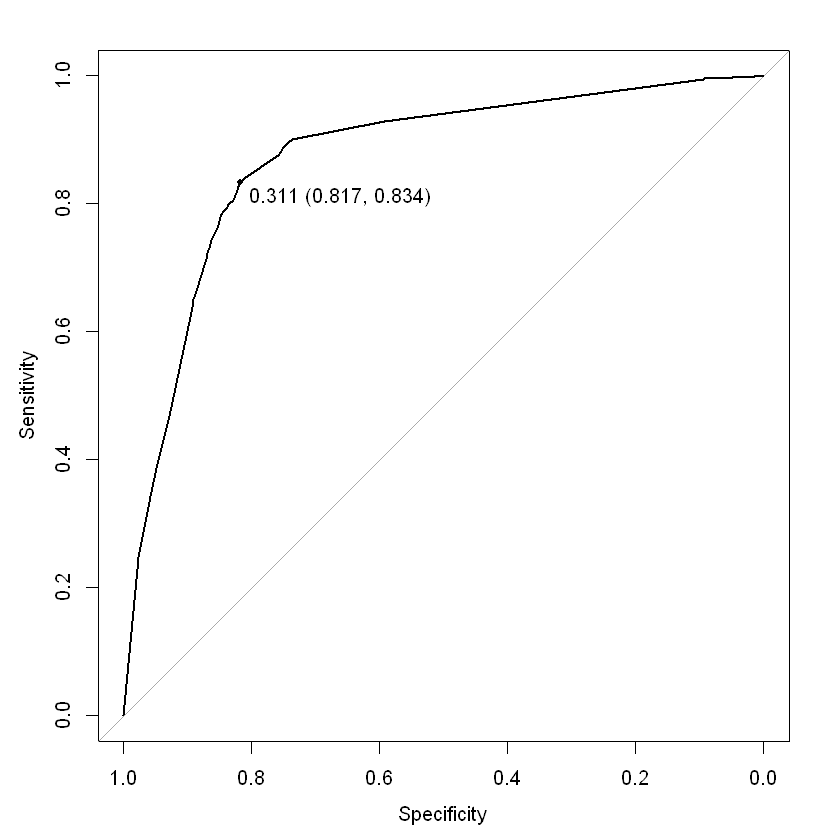

In [19]:
result.roc <- roc(sub.test$target, result.predicted.prob[,"OK"]) # Draw ROC curve.
plot(result.roc, print.thres="best", print.thres.best.method="closest.topleft")

In [20]:
result.coords <- coords(result.roc, "best", best.method="closest.topleft", ret=c("threshold", "accuracy"))
print(result.coords)#to get threshold and accuracy

threshold  accuracy 
0.3113804 0.8227109 


##### Saving model

In [22]:
save(rpart.model.optimal, file="rpart_model.Rdata")

##### generating the response for the validation subset

In [23]:
result.predicted.prob.valid <- predict(rpart.model.optimal, projetValid , type="prob") # Prediction on validation subset
projetValid$Id = as.character(projetValid$Id)
validation.results = cbind(projetValid[,"Id",with=FALSE],result.predicted.prob.valid)
write.csv(validation.results, file = "validation_results.csv")